In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

### Question 0
Load the telco data file we used in Lab 3, and perform a train-test split. Now build a Random Forest model, and print the score on train and test. 

In [3]:
df=pd.read_csv("3. telco.csv")

df.head(5)



,Unnamed: 0,tenure,Partner,Dependents,gender,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,1,0,0,0,1,29.85,29.85,1,...,0,0,0,0,0,0,0,1,0,No
1,1,34,0,0,1,1,0,56.95,1889.50,0,...,0,0,0,0,1,0,0,0,1,No
2,2,2,0,0,1,1,1,53.85,108.15,0,...,0,0,0,0,0,0,0,0,1,Yes
3,3,45,0,0,1,0,0,42.30,1840.75,1,...,0,0,0,0,1,0,0,0,0,No
4,4,2,0,0,0,1,1,70.70,151.65,0,...,0,0,0,0,0,0,0,1,0,Yes


In [4]:
df.shape

(7032, 31)

In [5]:
X = df.drop(["Churn"], axis=1)  #Axis=1 = the whole column --> Sometimes we want to drop more than one columns
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, random_state=0)

print("shape of X:", X.shape)
print("\nshape of y:", y.shape)

shape of X: (7032, 30)

shape of y: (7032,)


<h2>Question 1</h2>
Build random forest models with the number of estimators ranging from 20 to 500. Write a loop where n_estimators increases 20 at each iteration, and save the train and test scores in a list. Print the results sorted by test accuracy. <i>Hint: before the loop, create two empty lists for train_scores and test_scores. With each iteration, you can use the append method to add the current scores to the train and test lists.</i>

In [94]:

from sklearn.ensemble import RandomForestClassifier

n=list(range(20,501,20))

train_scores=[]
test_scores=[]
j=0

for i in n:
    
    clf=RandomForestClassifier(n_estimators=i,random_state=0).fit(X_train,y_train)
    train_scores.append(clf.score(X_train,y_train))
    test_scores.append(clf.score(X_test,y_test))
    print ("{})  For n_estimators = {}, the train score is : {:.3f} and the test score is: {:.3f} \n".format(j+1 ,n[j], train_scores[j], test_scores[j]))
    j+=1




1)  For n_estimators = 20, the train score is : 0.719 and the test score is: 0.022 

2)  For n_estimators = 40, the train score is : 0.720 and the test score is: 0.022 

3)  For n_estimators = 60, the train score is : 0.720 and the test score is: 0.022 

4)  For n_estimators = 80, the train score is : 0.720 and the test score is: 0.022 

5)  For n_estimators = 100, the train score is : 0.720 and the test score is: 0.022 

6)  For n_estimators = 120, the train score is : 0.720 and the test score is: 0.020 

7)  For n_estimators = 140, the train score is : 0.720 and the test score is: 0.020 

8)  For n_estimators = 160, the train score is : 0.720 and the test score is: 0.020 

9)  For n_estimators = 180, the train score is : 0.720 and the test score is: 0.022 

10)  For n_estimators = 200, the train score is : 0.720 and the test score is: 0.022 

11)  For n_estimators = 220, the train score is : 0.720 and the test score is: 0.022 

12)  For n_estimators = 240, the train score is : 0.720 

In [95]:
test_scores

[0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.020370370370370372,
 0.020370370370370372,
 0.020370370370370372,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.020370370370370372,
 0.022222222222222223,
 0.024074074074074074,
 0.024074074074074074,
 0.024074074074074074,
 0.024074074074074074,
 0.024074074074074074,
 0.025925925925925925,
 0.025925925925925925,
 0.025925925925925925,
 0.024074074074074074,
 0.024074074074074074,
 0.025925925925925925,
 0.025925925925925925]

<h2> Question 2</h2>

Create a line plot of train and test scores for each value of the number of estimators, by completing the following code. 

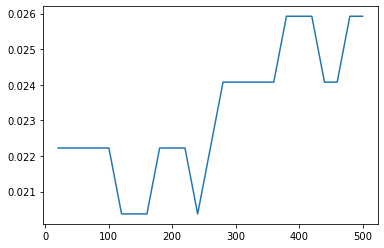

In [96]:
# first just plot test scores
# x axis - a list of the values for number of estimators
x = n
# two arguments to plot are the x axis values and the y axis values
# y axis - list of test scores
plt.plot(x, test_scores)
# finally, to show the plots
plt.show()

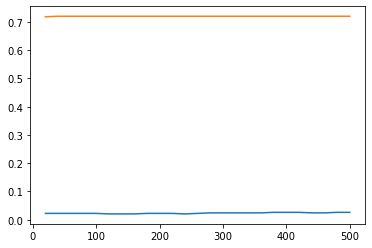

In [97]:
# now plot train and test scores
# x axis - a list of the values for number of estimators
x = n
# y axis - list of train scores
# two arguments to plot are the x axis values and the y axis values
plt.plot(x , test_scores)
# do another plot, with same x axis, and on the y axis - list of test scores
plt.plot(x,train_scores)
# finally, to show the plots
plt.show()

<h2>Question 3</h2>
 Build an MLP model, and print the score on train and test. 

In [98]:
from sklearn.neural_network import MLPClassifier


nnclf = MLPClassifier(solver="lbfgs",activation="tanh", random_state=0).fit(X_train, y_train)


print ("The train score is : {:.3f} and the test score is: {:.3f} \n".format(nnclf.score(X_train, y_train), nnclf.score(X_test, y_test)))


The train score is : 0.017 and the test score is: 0.015 



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<h2>Question 4</h2>
Now try mlp models with different values for the hidden layer size. Try with a single hidden layer, with sizes ranging from 1 to 100, incremented by 5. (Use the MLP parameter, hidden_layer_sizes, which takes a value as a tuple -- for a single hidden layer, just one value in parenthesis.) Save the train and test scores in two lists, and print the results, sorted by test score.

In [99]:
#This code example shows the classifier being fit to the training data using a SINGLE hidden layer with 
# three different numbers of hidden units in the layer, one unit, 10 units, and 100 units. 

units=list(range(1,100,5))
mlp_train_scores=list()
mlp_test_scores=list()
j=0

for i in units:
    mlpclf = MLPClassifier(hidden_layer_sizes=i,random_state=0).fit(X_train,y_train)

    mlp_train_scores.append(mlpclf.score(X_train,y_train))
    mlp_test_scores.append(mlpclf.score(X_test,y_test))
    j+=1

    print("{}) For the MLP model with a single hidden layer unit size {} the train score is: {:.3f} and the test score is: {:.3f}\n".format(j, i, mlp_train_scores[j-1],mlp_test_scores[j-1]))

    #Parameters to take into consideration in MLP:
    # 1) Hidden_layer_sizes --> amount of hidden layers and amount of units of each hidden layer
    # 2) Alpha --> Controls weight on the regularization penalty that shrinks weights to zero. Default: alpha = 0.0001. L2 regularization
    # 3) Activation: controls the nonlinear function used for the activation function, including: “ReLu” (default), “logistic”, “tanh”.


1) For the MLP model with a single hidden layer unit size 1 the train score is: 0.010 and the test score is: 0.013

2) For the MLP model with a single hidden layer unit size 6 the train score is: 0.004 and the test score is: 0.002

3) For the MLP model with a single hidden layer unit size 11 the train score is: 0.011 and the test score is: 0.013

4) For the MLP model with a single hidden layer unit size 16 the train score is: 0.001 and the test score is: 0.000

5) For the MLP model with a single hidden layer unit size 21 the train score is: 0.005 and the test score is: 0.004

6) For the MLP model with a single hidden layer unit size 26 the train score is: 0.028 and the test score is: 0.019

7) For the MLP model with a single hidden layer unit size 31 the train score is: 0.025 and the test score is: 0.007

8) For the MLP model with a single hidden layer unit size 36 the train score is: 0.019 and the test score is: 0.015

9) For the MLP model with a single hidden layer unit size 41 the t

<h2>Question 5</h2>
Make a line plot of train and test scores for the mlp models with the different hidden layer sizes.

In [100]:
len(test_scores)

25

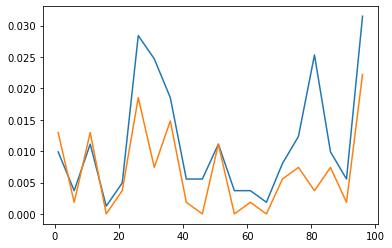

In [101]:
# x axis - a list of the values for number of estimators
x=units
# y axis - list of train scores
# two arguments to plot are the x axis values and the y axis values
plt.plot(x,mlp_train_scores)
# do another plot, with same x axis, and on the y axis - list of test scores
plt.plot(x,mlp_test_scores)
# finally need to show the plots

plt.show()


<h2>Question 6</h2>
Read the HomesSoldHellerup.csv file, using read_csv (note that the separator is a semicolon and not a comma, which is the default). Display the different values for the Type feature, using value_counts. Do the same with Type of Sale.

In [102]:
# Rearrange the code for what the question is asking for

df = pd.read_csv("4. HomesSoldHellerup.csv", sep=";" ,encoding = 'utf8')
df.head(5)


,Road name,Road Number,Type,m2,Build Year,ZipCode,City,Date of Sale,Type of Sale,Price
0,Tuborgvej,54,Lejlighed,54,1932,2900,Hellerup,20-07-15,Alm. Salg,1700000
1,Tuborgvej,54,Lejlighed,87,1932,2900,Hellerup,12-05-15,Alm. Salg,2815000
2,Tuborgvej,54,Lejlighed,63,1932,2900,Hellerup,29-12-10,Alm. Salg,1575000
3,Tuborgvej,54,Lejlighed,54,1932,2900,Hellerup,10-04-12,Alm. Salg,1340000
4,Tuborgvej,54,Lejlighed,63,1932,2900,Hellerup,04-02-12,Alm. Salg,1435000


# Exploring the dataset

In [103]:
print("Shape of the CSV file: ", df.shape)
print("Columns are: ", list(df.columns))



Shape of the CSV file:  (2160, 10)
Columns are:  ['Road name', 'Road Number', 'Type', 'm2', 'Build Year', 'ZipCode', 'City', 'Date of Sale', 'Type of Sale', 'Price']


In [104]:
df.info()  #This tells us that we have 2160 records in our dataset and that we don't have any NA values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Road name     2160 non-null   object
 1   Road Number   2160 non-null   object
 2   Type          2160 non-null   object
 3   m2            2160 non-null   int64 
 4   Build Year    2160 non-null   int64 
 5   ZipCode       2160 non-null   int64 
 6   City          2160 non-null   object
 7   Date of Sale  2160 non-null   object
 8   Type of Sale  2160 non-null   object
 9   Price         2160 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 168.9+ KB


In [105]:
df["Type"].value_counts()

Lejlighed          1237
Villa               742
Rækkehus            174
Stuehus               3
Erhverv               2
Døgninstitution       2
Name: Type, dtype: int64

In [106]:
df["Type of Sale"].value_counts()

Alm. Salg    1978
Fam. Salg     109
Andet          52
Auktion        21
Name: Type of Sale, dtype: int64

<h2>Question 7</h2>
We assign to X a list of the features, m2 and Build Year, and the target value y is Price, as shown below. Perform a train-test split, and then create a Linear Regression model. Print the score for train and test.

In [107]:
X=df[['m2','Build Year']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)


In [108]:

from sklearn.linear_model import LinearRegression

linr= LinearRegression().fit(X_train,y_train)
linr_train_score=linr.score(X_train, y_train)
linr_test_score=linr.score(X_test,y_test)

print("The scores for the linear Regression model are; Train: {:.3f}  and Test {:.3f}".format(linr_train_score,linr_test_score))

The scores for the linear Regression model are; Train: 0.368  and Test 0.176


<h2>Question 8</h2>
Add the ZipCode feature to X. Then redo the train-test split, and create a Linear Regression model. Print the score for train and test.

In [109]:
X2=df[['m2','Build Year','ZipCode']]
y2 = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X2,y2, random_state=0)


linr2= LinearRegression().fit(X_train,y_train)
linr2_train_score=linr2.score(X_train, y_train)
linr2_test_score=linr2.score(X_test,y_test)

print("The scores for the linear Regression model with an extra feature are; Train: {:.3f}  and Test {:.3f}".format(linr2_train_score,linr2_test_score))


The scores for the linear Regression model with an extra feature are; Train: 0.369  and Test 0.181


<h2> Question 9</h2>
Build a Random Forest regressor for this data. Set random_state, with otherwise default settings, and print train and test scores.

# Key parameters of RandomForestClassifier
- n_estimators: number of trees to use in ensemble (default: 10)
   
    Should be larger for larger datasets to reduce overfitting (but uses more computation)
    
- max_features: has a strong effect on performance. Influences the diversity of trees in the forest.
    
    Default works well in practice, but adjusting may lead to some further gains. 
    
- max_depth: controls the depth of each tree (default: None. Splits until all leaves are pure).
- N_jobs: How many cores to use in parallel during training.
- Choose a fixed setting for the random_state parameter if you need reproducible results.

In [110]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
rfclf= RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train,y_train)
rfclf_train_score= rfclf.score(X_train, y_train)
rfclf_test_score=rfclf.score(X_test, y_test)

print("Score of the Random Forest Classifier with 2 features; Train: {:.3f}  ;  Test{:.3f}".format(rfclf_train_score,rfclf_test_score))


X_train, X_test, y_train, y_test = train_test_split(X2,y2, random_state=0)
rfclf2= RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train,y_train)
rfclf2_train_score= rfclf2.score(X_train, y_train)
rfclf2_test_score=rfclf2.score(X_test, y_test)

print("Score of the Random Forest Classifier with 3 features; Train: {:.3f}  ;  Test{:.3f}".format(rfclf2_train_score,rfclf2_test_score))



Score of the Random Forest Classifier with 2 features; Train: 0.656  ;  Test0.024
Score of the Random Forest Classifier with 3 features; Train: 0.651  ;  Test0.022
